In [3]:
import numpy as np
import scipy as sp
from scipy import signal as sig
from matplotlib import pyplot as plt
fname = 'erp_hexVPsag.npz'
import bci_minitoolbox as bci
cnt, fs, clab, mnt, mrk_pos, mrk_class, mrk_className = bci.load_data(fname)


In [4]:
C=np.cov(cnt)
[D,V]=np.linalg.eigh(C)


(55,)
(55, 2)


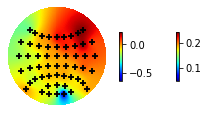

In [13]:
plt.subplot(211)
print(np.shape(V[:,-1]))
print(np.shape(mnt))
bci.scalpmap(mnt, V[:,-1])
bci.scalpmap(mnt, V[:,-2])

In [9]:
idx=[-1,-2]
cnt_s=V[:,idx].T@cnt #W.TX

In [10]:
x_eyes=V[:,idx]@cnt_s #AS
cnt_artifree=cnt-x_eyes

In [11]:
band=[8 ,14]
b,a = sig.butter(5,(band[0]/fs*2,band[1]/fs*2), btype = 'bandpass')
cnt_filt = sig.lfilter(b,a,cnt)